In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/amazon_reviews/1429_1.csv")
df2= pd.read_csv('/content/drive/MyDrive/amazon_reviews/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df= pd.concat([df, df2], ignore_index=True)

In [5]:
# train_df=pd.read_csv.csv')
train_df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df.shape

(39660, 27)

In [7]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [9]:
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (39660, 27)


In [10]:
train_df=train_df[["reviews.text","reviews.rating"]]

In [11]:
train_df["reviews.rating"].value_counts()

5.0    27253
4.0     9749
3.0     1696
1.0      473
2.0      456
Name: reviews.rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



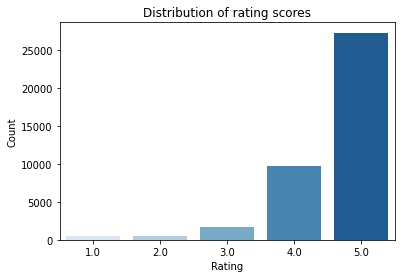

In [50]:
sns.countplot(train_df['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
train_df.rename(columns={"reviews.text":"reviews","reviews.rating":"sentiment","reviews.title":"title"},inplace=True)

In [13]:
train_df

,reviews,sentiment
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
39655,This is a great tablet for the price. Amazon i...,5.0
39656,This tablet is the perfect size and so easy to...,5.0
39657,Purchased this for my son. Has room to upgrade...,4.0
39658,I had some thoughts about getting this for a 5...,5.0


## map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1(POSITIVE) 

In [14]:
good_reviews=train_df[train_df['sentiment']>=4]['reviews']
bad_reviews=train_df[train_df['sentiment']<=3]['reviews']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0    This product so far has not disappointed. My c...
1    great for beginner or experienced person. Boug...
2    Inexpensive tablet for him to use and learn on...
3    I've had my Fire HD 8 two weeks now and I love...
4    I bought this for my grand daughter when she c...
5    This amazon fire 8 inch tablet is the perfect ...
6    Great for e-reading on the go, nice and light ...
7    I gave this as a Christmas gift to my inlaws, ...
8    Great as a device to read books. I like that i...
9    I love ordering books and reading them with th...
Name: reviews, dtype: object
First 10 samples of bad reviews
 117    Didn't have some of the features I was looking...
126    i Bought this around black friday for $60 hopi...
169    I bought this tablet for my 4 year old daughte...
222    I was hoping to use Google launcher with this ...
226    The tablet works fine. It is responsive with g...
241    Didn't want to go to the sites amazon wanted m...
281    Not a

In [15]:
count_good=train_df[train_df['sentiment'] >=4]
count_bad=train_df[train_df['sentiment']<=3]

In [16]:
count_bad=count_bad[["reviews","sentiment"]]

In [17]:
count_good=count_good[["reviews","sentiment"]]
count_good.reviews
count_good.reset_index(inplace=True,drop=True)
count_bad.reset_index(inplace=True,drop=True)

In [18]:
count_bad

,reviews,sentiment
0,Didn't have some of the features I was looking...,2.0
1,i Bought this around black friday for $60 hopi...,1.0
2,I bought this tablet for my 4 year old daughte...,1.0
3,I was hoping to use Google launcher with this ...,3.0
4,The tablet works fine. It is responsive with g...,3.0
...,...,...
2620,The battery is having more and more trouble ho...,2.0
2621,My daughter has had this tablet for almost 2 m...,3.0
2622,Very cheap and was not impressed at all never ...,1.0
2623,"Hard to use, Lots of ads, and Randomly closes ...",2.0


In [19]:
count_good

,reviews,sentiment
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
36997,This is a great tablet for the price. Amazon i...,5.0
36998,This tablet is the perfect size and so easy to...,5.0
36999,Purchased this for my son. Has room to upgrade...,4.0
37000,I had some thoughts about getting this for a 5...,5.0


In [20]:
z=np.mean([len(w) for w in str(count_good.reviews).split()])
print(z)

4.157894736842105


In [64]:
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



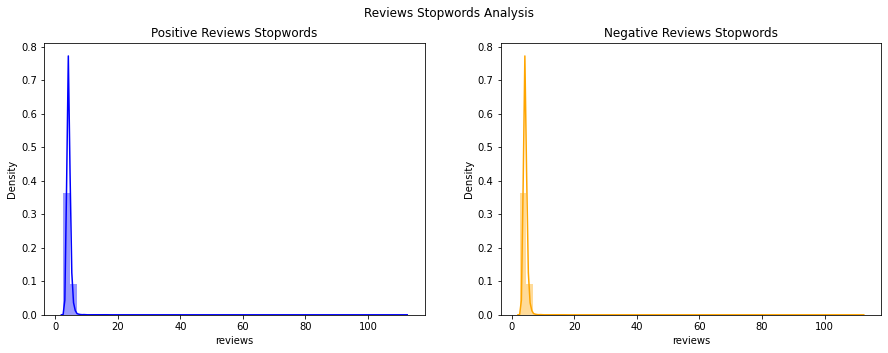

In [65]:
def plot_count_1(count_ones,count_zeros,title_1,title_2, subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=train_df['reviews'].apply(lambda z : np.mean([len(w) for w in str(z).split()]))
count_bad_stops=train_df['reviews'].apply(lambda z : np.mean([len(w) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

# wordcloud of stopwords

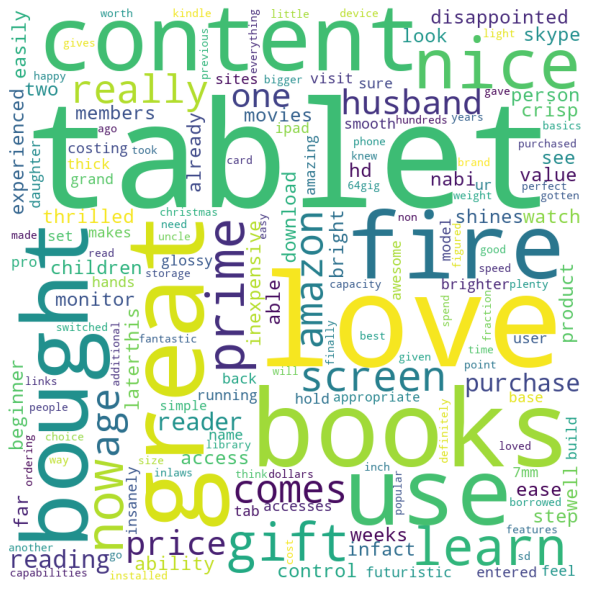

In [24]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in train_df.reviews[:10]:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
  

In [21]:
sentiment={5:"positive",4:"positive",3:"negative",2:"negative",1:"negative"}
train_df["sentiment"]=train_df['sentiment'].map(sentiment)
train_df

,reviews,sentiment
0,This product so far has not disappointed. My c...,positive
1,great for beginner or experienced person. Boug...,positive
2,Inexpensive tablet for him to use and learn on...,positive
3,I've had my Fire HD 8 two weeks now and I love...,positive
4,I bought this for my grand daughter when she c...,positive
...,...,...
39655,This is a great tablet for the price. Amazon i...,positive
39656,This tablet is the perfect size and so easy to...,positive
39657,Purchased this for my son. Has room to upgrade...,positive
39658,I had some thoughts about getting this for a 5...,positive


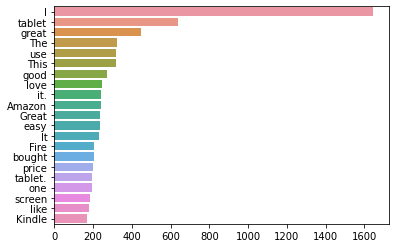

In [26]:
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['sentiment']==word]['reviews'][0:2000].str.split():
        for i in x:
            corpus.append(i)
    return corpus


corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:50]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [66]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace

def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_bad['reviews']
train_df_ones=count_good['reviews']




def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# print("Bi-gram analysis")
# freq_train_df_zero=create_dict(train_df_zero[:200],2)
# #print(freq_train_df_zero)
# trace_zero=create_new_df(freq_train_df_zero)
# freq_train_df_ones=create_dict(train_df_ones[:200],2)
# #print(freq_train_df_zero)
# trace_ones=create_new_df(freq_train_df_ones)
# plot_grams(trace_zero,trace_ones)
# print("Tri-gram analysis")
# freq_train_df_zero=create_dict(train_df_zero[:200],3)
# #print(freq_train_df_zero)
# trace_zero=create_new_df(freq_train_df_zero)
# freq_train_df_ones=create_dict(train_df_ones[:200],3)
# #print(freq_train_df_zero)
# trace_ones=create_new_df(freq_train_df_ones)
# plot_grams(trace_zero,trace_ones)

In [22]:
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
train_df['reviews']=train_df['reviews'].fillna('').apply(str)
train_df['reviews']=train_df['reviews'].apply(lambda z: remove_punctuations(z))

train_df['reviews']=train_df['reviews'].apply(lambda z: remove_html(z))
train_df['reviews']=train_df['reviews'].apply(lambda z: remove_url(z))
train_df['reviews']=train_df['reviews'].apply(lambda z: remove_emoji(z))
    

In [23]:
train_df

,reviews,sentiment
0,This product so far has not disappointed My ch...,positive
1,great for beginner or experienced person Bough...,positive
2,Inexpensive tablet for him to use and learn on...,positive
3,Ive had my Fire HD 8 two weeks now and I love ...,positive
4,I bought this for my grand daughter when she c...,positive
...,...,...
39655,This is a great tablet for the price Amazon is...,positive
39656,This tablet is the perfect size and so easy to...,positive
39657,Purchased this for my son Has room to upgrade ...,positive
39658,I had some thoughts about getting this for a 5...,positive


In [24]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']

In [33]:
train_df

,reviews,sentiment
0,This product so far has not disappointed My ch...,positive
1,great for beginner or experienced person Bough...,positive
2,Inexpensive tablet for him to use and learn on...,positive
3,Ive had my Fire HD 8 two weeks now and I love ...,positive
4,I bought this for my grand daughter when she c...,positive
...,...,...
39655,This is a great tablet for the price Amazon is...,positive
39656,This tablet is the perfect size and so easy to...,positive
39657,Purchased this for my son Has room to upgrade ...,positive
39658,I had some thoughts about getting this for a 5...,positive


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

train_df['reviews']=train_df['reviews'].apply(lambda z: lemma_traincorpus(z))

In [37]:
from nltk.stem import *
def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

sample_train_df=train_df[5:10]
sample_train_df['reviews']=sample_train_df['reviews'].apply(lambda z: stem_traincorpus(z))
sample_train_df['reviews']

5    This amazon fire 8 inch tablet is the perfect ...
6    Great for ereading on the go nice and light we...
7    I gave this as a Christmas gift to my inlaws h...
8    Great as a device to read books I like that it...
9    I love ordering books and reading them with th...
Name: reviews, dtype: object

In [38]:
train_li=[]
for i in range(len(train_df)):
    if (train_df['sentiment'][i]=='positive'):
        train_li.append(1)
    else:
        train_li.append(0)
        
train_df['sentiment_score']=train_li
train_df.head(20)

,reviews,sentiment,sentiment_score
0,This product so far has not disappointed My ch...,positive,1
1,great for beginner or experienced person Bough...,positive,1
2,Inexpensive tablet for him to use and learn on...,positive,1
3,Ive had my Fire HD 8 two weeks now and I love ...,positive,1
4,I bought this for my grand daughter when she c...,positive,1
5,This amazon fire 8 inch tablet is the perfect ...,positive,1
6,Great for ereading on the go nice and light we...,positive,1
7,I gave this as a Christmas gift to my inlaws h...,positive,1
8,Great as a device to read books I like that it...,positive,1
9,I love ordering books and reading them with th...,positive,1


Text(0.5, 0, 'Class Count')

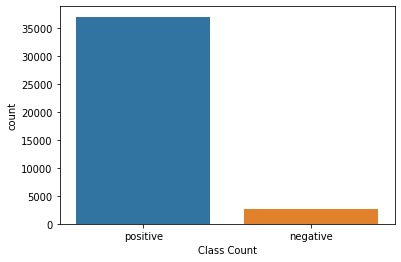

In [78]:
(train_df.sentiment.value_counts() *100 / len(df), 2)
sns.countplot(train_df.sentiment)
plt.xlabel('Class Count')

# BERT

In [ ]:
reviews = train_df['reviews'].values.tolist()
labels = train_df['sentiment_score'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [ ]:
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)
assert num_gpus_available > 0
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

Num GPUs Available:  1
     |████████████████████████████████| 2.5MB 30.7MB/s 
     |████████████████████████████████| 901kB 41.3MB/s 
     |████████████████████████████████| 3.3MB 35.4MB/s 


In [ ]:
#Assign tokenizer object to the tokenizer class
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
tokenizer([training_sentences[0]], truncation=True, padding=True, max_length=128)

{'input_ids': [[101, 2023, 2003, 1996, 2190, 2518, 1999, 2237, 1045, 2293, 2129, 4248, 2009, 16412, 2000, 10954, 1045, 5959, 1996, 3835, 3737, 1997, 2189, 2035, 2154, 2146, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(train_encodings),
                            training_labels
                            ))
val_dataset = tf.data.Dataset.from_tensor_slices((
                            dict(val_encodings),
                            validation_labels
                            ))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=4,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

KeyboardInterrupt: ignored

In [ ]:
model.save_pretrained("./sentiment")
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")

Some layers from the model checkpoint at ./sentiment were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./sentiment and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_sentence = "This is a really good product. I love it"
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

In [ ]:
tf_output = loaded_model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(label)
int_ = np.asscalar(label)
print(int_)
print(labels[int_])

[1]
1
Positive


# Feature Engineering and Selection

In [39]:
data= train_df

In [40]:
data

,reviews,sentiment,sentiment_score
0,This product so far has not disappointed My ch...,positive,1
1,great for beginner or experienced person Bough...,positive,1
2,Inexpensive tablet for him to use and learn on...,positive,1
3,Ive had my Fire HD 8 two weeks now and I love ...,positive,1
4,I bought this for my grand daughter when she c...,positive,1
...,...,...,...
39655,This is a great tablet for the price Amazon is...,positive,1
39656,This tablet is the perfect size and so easy to...,positive,1
39657,Purchased this for my son Has room to upgrade ...,positive,1
39658,I had some thoughts about getting this for a 5...,positive,1


#Using tf-idf

In [41]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['reviews'])
features = vectorizer.transform(data['reviews'])

features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,10,4k,50,ability,able,about,absolutely,access,account,actually,add,added,addition,ads,affordable,after,again,age,ago,alexa,all,allows,almost,along,already,also,although,always,am,amazing,amazon,amazons,an,and,android,another,answer,answers,any,anyone,...,weeks,weight,well,went,were,what,when,where,which,while,white,who,whole,why,wife,wifi,will,wireless,wish,with,without,wonderful,wont,work,worked,working,works,worth,would,wouldnt,wrong,year,years,yet,you,young,your,youre,youtube,yr
0,0.0,0.0,0.0,0.299483,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.080195,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.201895,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.132194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.137477,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.275791,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.078732,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.104816,0.0,0.0,0.120819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.078333,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.115223,0.000000,0.0,0.0,0.219306,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148355,0.0,0.088601,0.0,0.0,0.000000,0.000000,0.137628,0.107798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071168,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276577,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.08461,0.0,0.0,0.0,0.000000,0.066798,0.0,0.0,0.200294,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166631,0.000000,0.098453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088116,0.0,0.0,0.055028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064998,0.0,0.0,0.0,0.0,0.0


# spilitting data to test and train

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(31728, 700)
Test set shape	:(7932, 700)


In [44]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()

,10,4k,50,ability,able,about,absolutely,access,account,actually,add,added,addition,ads,affordable,after,again,age,ago,alexa,all,allows,almost,along,already,also,although,always,am,amazing,amazon,amazons,an,and,android,another,answer,answers,any,anyone,...,weight,well,went,were,what,when,where,which,while,white,who,whole,why,wife,wifi,will,wireless,wish,with,without,wonderful,wont,work,worked,working,works,worth,would,wouldnt,wrong,year,years,yet,you,young,your,youre,youtube,yr,sentiment_score
24291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213653,0.135618,0.0,0.0,0.067775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
39179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
7650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
18435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223512,0.000000,0.0,0.0,0.0,0.0,0.0,0.206945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182276,0.0,0.0,0.0,1
27489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.123381,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.310618,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


# oversampling

In [45]:
train_data['sentiment_score'].value_counts()

1    29583
0     2145
Name: sentiment_score, dtype: int64

In [46]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
# df_train_over = df_train_over.sample(frac=1).reset_index(drop=True)
df_train_over.head()

,10,4k,50,ability,able,about,absolutely,access,account,actually,add,added,addition,ads,affordable,after,again,age,ago,alexa,all,allows,almost,along,already,also,although,always,am,amazing,amazon,amazons,an,and,android,another,answer,answers,any,anyone,...,weight,well,went,were,what,when,where,which,while,white,who,whole,why,wife,wifi,will,wireless,wish,with,without,wonderful,wont,work,worked,working,works,worth,would,wouldnt,wrong,year,years,yet,you,young,your,youre,youtube,yr,sentiment_score
24291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213653,0.135618,0.0,0.0,0.067775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
39179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
7650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
18435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.223512,0.000000,0.0,0.0,0.0,0.0,0.0,0.206945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182276,0.0,0.0,0.0,1
27489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.123381,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.310618,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [47]:
df_train_over.dropna(inplace=True)

In [48]:
df_train_over.shape

(59166, 701)

In [49]:
df_train_over['sentiment_score'].value_counts()


1    29583
0    29583
Name: sentiment_score, dtype: int64

In [50]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

# Models

In [51]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

# Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB

              precision    recall  f1-score   support

           0       0.21      0.80      0.34       513
           1       0.98      0.79      0.88      7419

    accuracy                           0.80      7932
   macro avg       0.60      0.80      0.61      7932
weighted avg       0.93      0.80      0.84      7932

AUC  0.7980777188962432


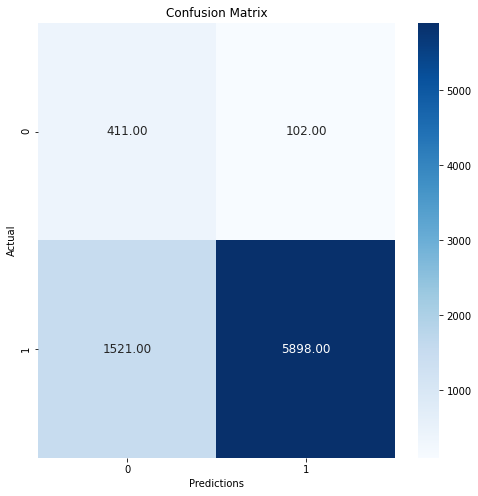

In [94]:
modeling(MultinomialNB())

# XGBoost

In [95]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.22      0.75      0.34       513
           1       0.98      0.81      0.89      7419

    accuracy                           0.81      7932
   macro avg       0.60      0.78      0.61      7932
weighted avg       0.93      0.81      0.85      7932

AUC  0.7835145891416775


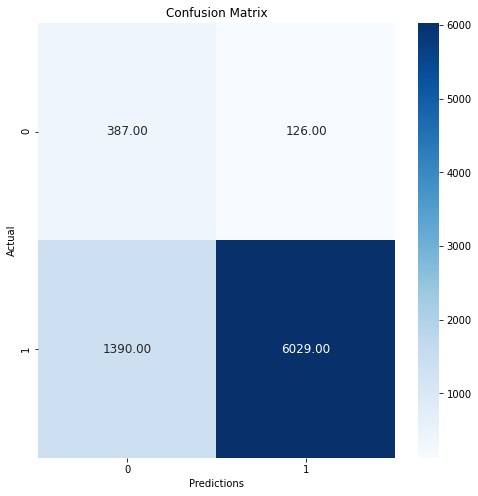

In [96]:
modeling(XGBClassifier());

# MLP model

In [52]:
from keras import models
from keras.layers import Dense

In [62]:
# Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(700,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [63]:
# Compile the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                11216     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 11,505
Trainable params: 11,505
Non-trainable params: 0
_________________________________________________________________


In [65]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = y_train[:5000]
y_train_new = y_train[5000:]

In [66]:
x_train_new = np.asarray(x_train_new)
y_train_new = np.asarray(y_train_new)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

In [67]:
hist = model.fit(x_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
106/106 [==============================] - 12s 9ms/step - loss: 0.6509 - accuracy: 0.7212 - val_loss: 0.5048 - val_accuracy: 0.7744
Epoch 2/20
106/106 [==============================] - 0s 5ms/step - loss: 0.4417 - accuracy: 0.8322 - val_loss: 0.4387 - val_accuracy: 0.7914
Epoch 3/20
106/106 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.8472 - val_loss: 0.4471 - val_accuracy: 0.7884
Epoch 4/20
106/106 [==============================] - 0s 5ms/step - loss: 0.3620 - accuracy: 0.8528 - val_loss: 0.3999 - val_accuracy: 0.8152
Epoch 5/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3481 - accuracy: 0.8604 - val_loss: 0.4199 - val_accuracy: 0.8022
Epoch 6/20
106/106 [==============================] - 1s 5ms/step - loss: 0.3429 - accuracy: 0.8597 - val_loss: 0.4183 - val_accuracy: 0.8004
Epoch 7/20
106/106 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.8642 - val_loss: 0.3828 - val_accuracy: 0.8204
Epoch

In [68]:
import matplotlib.pyplot as plt

In [69]:
h = hist.history

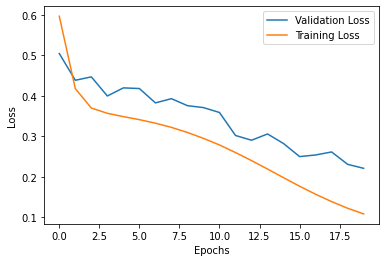

In [70]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

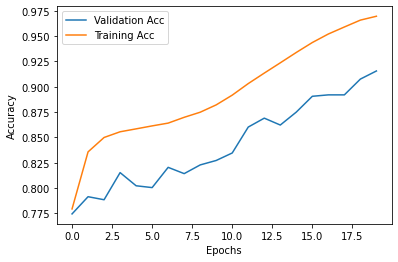

In [74]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [78]:
model.evaluate(X_test,y_test)[1]

248/248 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.9019


0.9019162654876709

In [82]:
model.evaluate(X_train,y_train)[1]


1849/1849 [==============================] - 2s 1ms/step - loss: 0.1068 - accuracy: 0.9688


0.9688334465026855

In [83]:
model.predict(X_test)

array([[1.        ],
       [0.99965465],
       [0.99999964],
       ...,
       [0.9999579 ],
       [0.71681166],
       [0.0338628 ]], dtype=float32)

# LSTM

In [93]:
# # Create a 2D Tensor to be processed by the embedding layer
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

In [94]:
# Create a Model in Keras

from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(700,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          44800     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 47,937
Trainable params: 47,937
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [96]:
from keras.callbacks import ModelCheckpoint # save the best model, fight overfiitting
from keras.callbacks import EarlyStopping #save time


checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlystop = EarlyStopping(monitor='val_acc',patience=1)



hist = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
370/370 [==============================] - 68s 180ms/step - loss: 0.6644 - acc: 0.6191 - val_loss: 0.9194 - val_acc: 0.0000e+00
Epoch 2/10
370/370 [==============================] - 66s 179ms/step - loss: 0.6638 - acc: 0.6217 - val_loss: 0.9912 - val_acc: 0.0000e+00


In [98]:
model.load_weights("best_model.h5")


In [99]:
model.evaluate(X_test,y_test)

248/248 [==============================] - 7s 27ms/step - loss: 0.5353 - acc: 0.9353


[0.5353097915649414, 0.9353252649307251]

In [101]:
model.evaluate(X_train,y_train)

1849/1849 [==============================] - 53s 28ms/step - loss: 0.7141 - acc: 0.5000


[0.7140910625457764, 0.5]